# 600_RQ2_Analysis_1
## Purpose 
Initial analysis of our Reseach Question 2  
## Datasets 
* _Input_: RQ2.csv
* _Output_: N/A

# Homegrown vs Foreign
### Do homegrown players generally perform the best in their respective leagues or are they inferior to the foreign players? 
## General Analysis:

In [1]:
import os.path
import pandas as pd
import matplotlib
import matplotlib.pylab as plt
import matplotlib as mpl
%matplotlib inline

#### Reading in our RQ2 dataset.

In [2]:
RQ2 = pd.read_csv(('../../data/analysis/RQ2.csv'))
RQ2 = RQ2.drop('Unnamed: 0', 1)
RQ2 = RQ2.iloc[1:]

#### Quick glance at the dataframe.

In [3]:
RQ2.head(5)

,Players,Position,league,age,nationality,overall,photo,skill_moves,pac,def,...,eur_wage,Homegrown,Abroad,Starts/Apps,Subbed Off/Apps,Overall Apps,Average Form,Goals/Apps,Assists/Apps,Clean Sheets/Apps
1,Aaron Cresswell,Defender,English Premier League,27.0,England,76.0,https://cdn.sofifa.org/18/players/189615.png,2.0,76.0,73.0,...,83000.0,True,False,0.980198,0.039604,101.0,2.821782,0.039604,0.099010,0.247525
2,Aaron Hughes,Defender,Scottish Premiership,37.0,Northern Ireland,71.0,https://cdn.sofifa.org/18/players/17725.png,2.0,23.0,72.0,...,5000.0,False,False,0.918919,0.000000,37.0,1.216216,0.000000,0.000000,0.162162
3,Aaron Hunt,Midfielder,German Bundesliga,30.0,Germany,76.0,https://cdn.sofifa.org/18/players/158138.png,3.0,68.0,39.0,...,38000.0,True,False,0.788136,0.279661,118.0,3.050847,0.211864,0.118644,0.000000
4,Aaron Lennon,Midfielder,English Premier League,30.0,England,77.0,https://cdn.sofifa.org/18/players/152747.png,3.0,83.0,38.0,...,97000.0,True,False,0.808333,0.391667,120.0,2.633333,0.100000,0.125000,0.000000
5,Aaron Leya Iseka,Forward,Belgian First Division A,19.0,Belgium,68.0,https://cdn.sofifa.org/18/players/223929.png,3.0,79.0,21.0,...,9000.0,False,False,0.375000,0.375000,8.0,2.125000,0.000000,0.250000,0.000000


### Creating dataframes
* **Homegrown** - contains all Homegrown players.<br> <br>
* **Foreign** - contains all Foreign players.

In [4]:
Homegrown = RQ2.loc[RQ2.Homegrown==True]
Foreign = RQ2.loc[RQ2.Homegrown==False]

### Count of Homegrown/Foreign
* Finding the amount of Homegrown and Foreign players and displaying them in a dataframe.

#### Findings
* Over **73%** of players in every league are Foreign which is a substantial amount of players.

,0
Homegrown,906
Foreign,2549


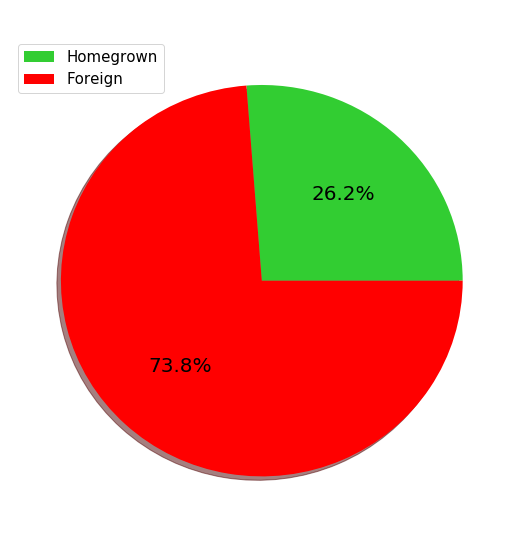

In [5]:
HomegrownLen = len(RQ2.loc[RQ2.Homegrown==True])
ForeignLen = len(RQ2.loc[RQ2.Homegrown==False])

HF = pd.DataFrame(columns = ["Homegrown", "Foreign"])
HF.set_value(0,'Homegrown',HomegrownLen)
HF.set_value(0,'Foreign',ForeignLen)
HF = HF.transpose()
mpl.rcParams['font.size'] = 20
HF.plot(figsize=(9,9),kind='pie',labels=['',''],y=0,colors=['limegreen','r'],autopct='%.1f%%',shadow=True)
plt.legend(prop={'size':15},labels=HF.index)
plt.title('Homegrown vs Foreign',color='white',fontsize=30)
plt.ylabel('')

HF

### Average Age Homegrown/Foreign
* Finding the average age of Homegrown and Foreign players and displaying them in a dataframe.

#### Findings
* Foreign players on average are **one/two years older** than their Homegrown counterparts.<br>This figure could be due to young players playing in their own country.

,Homegrown,Foreign
0,25.6611,26.7634


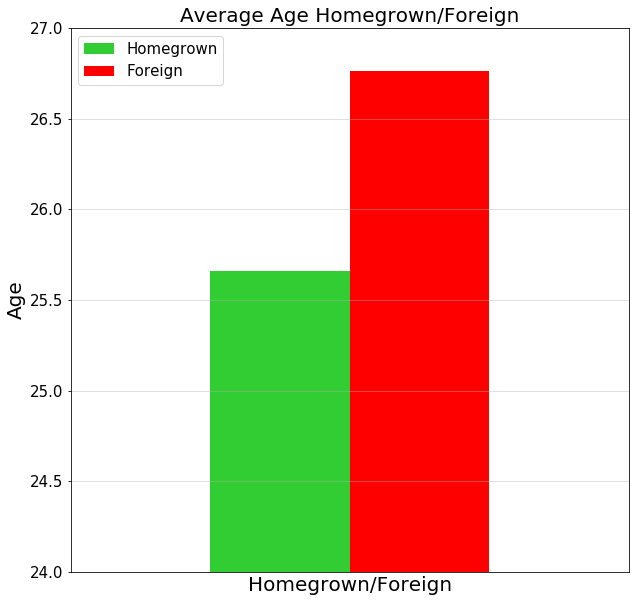

In [15]:
HomegrownAge = Homegrown.age.mean()
ForeignAge = Foreign.age.mean()

HFAge = pd.DataFrame(columns = ["Homegrown", "Foreign"])
HFAge.set_value(0,'Homegrown',HomegrownAge)
HFAge.set_value(0,'Foreign',ForeignAge)

mpl.rcParams['font.size'] = 15
axis_size=20
color = ['limegreen','r']
fig = plt.figure(figsize=(10,10))
ax0 = plt.subplot()
ax0.set_ylim([24,27])
ax0.set_ylabel('Age',size=axis_size)
ax0.set_xlabel('Homegrown/Foreign',size=axis_size)
ax0.set_title('Average Age Homegrown/Foreign',size=20)
HFAge.plot(ax=ax0,kind='bar',color=color,grid=True)
ax0.grid(alpha=0.5)
plt.xticks([])

HFAge

### Average Form Homegrown/Foreign
* Finding the average form of Homegrown and Foreign players and displaying them in a dataframe.

#### Findings
* Homegrown players on average perform **.2** better than Foreign players.

,Homegrown,Foreign
0,2.22323,2.01872


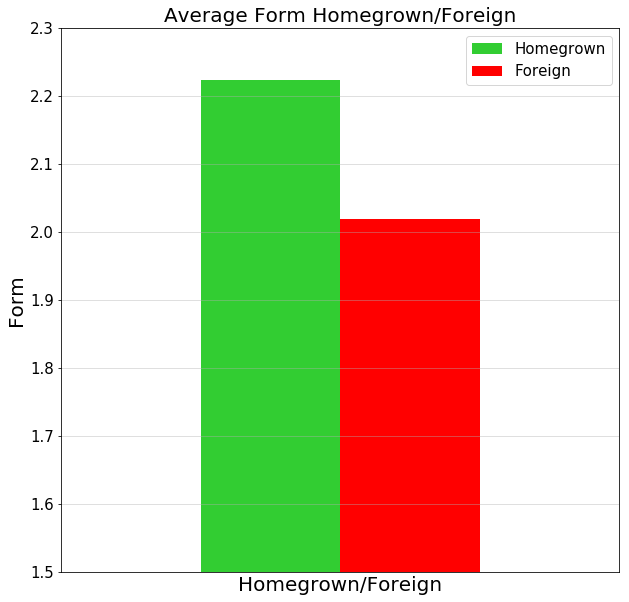

In [16]:
HomegrownForm = Homegrown['Average Form'].mean()
ForeignForm = Foreign['Average Form'].mean()

HFForm = pd.DataFrame(columns = ["Homegrown", "Foreign"])
HFForm.set_value(0,'Homegrown',HomegrownForm)
HFForm.set_value(0,'Foreign',ForeignForm)

mpl.rcParams['font.size'] = 15
axis_size=20
color = ['limegreen','r']
fig = plt.figure(figsize=(10,10))
ax0 = plt.subplot()
ax0.set_ylim([1.5,2.3])
ax0.set_ylabel('Form',size=axis_size)
ax0.set_xlabel('Homegrown/Foreign',size=axis_size)
ax0.set_title('Average Form Homegrown/Foreign',size=20)
HFForm.plot(ax=ax0,kind='bar',color=color,grid=True)
ax0.grid(alpha=0.5)
plt.xticks([])

HFForm

### Average Overall Homegrown/Foreign
* Finding the overall form of Homegrown and Foreign players and displaying them in a dataframe.

#### Findings
* Homegrown players on average are a **1 full rating higher** than Foreign players.

,Homegrown,Foreign
0,73.787,72.5441


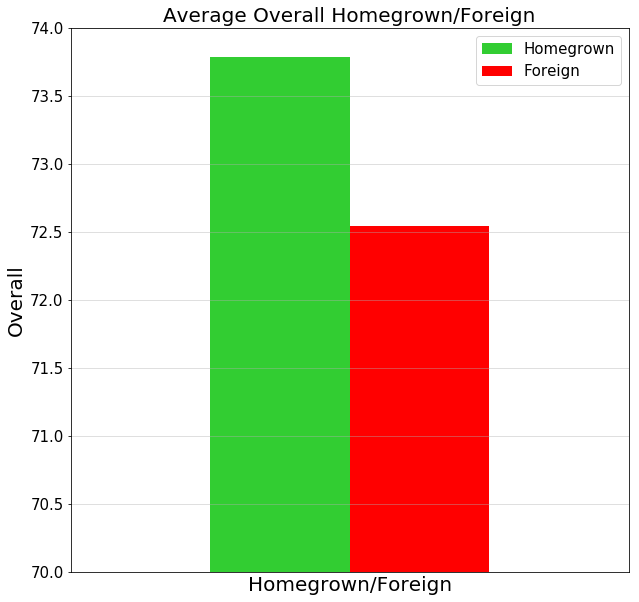

In [17]:
HomegrownOverall = Homegrown['overall'].mean()
ForeignOverall = Foreign['overall'].mean()

HFOverall = pd.DataFrame(columns = ["Homegrown", "Foreign"])
HFOverall.set_value(0,'Homegrown',HomegrownOverall)
HFOverall.set_value(0,'Foreign',ForeignOverall)

mpl.rcParams['font.size'] = 15
axis_size=20
color = ['limegreen','r']
fig = plt.figure(figsize=(10,10))
ax0 = plt.subplot()
ax0.set_ylim([70,74])
ax0.set_ylabel('Overall',size=axis_size)
ax0.set_xlabel('Homegrown/Foreign',size=axis_size)
ax0.set_title('Average Overall Homegrown/Foreign',size=20)
HFOverall.plot(ax=ax0,kind='bar',color=color,grid=True)
ax0.grid(alpha=0.5)
plt.xticks([])

HFOverall

### Creating dataframes
* **Home** - contains all Home players.<br> <br>
* **Abroad** - contains all Abroad players.

In [9]:
Abroad = RQ2.loc[RQ2.Abroad==True]
Home = RQ2.loc[RQ2.Abroad==False]

### Count of Home/Abroad
* Finding the amount of Home and Abroad players and displaying them in a dataframe.

#### Findings
* Only **4%** of players in every league are classed as Abroad players.

,0
Home,3299
Abroad,156


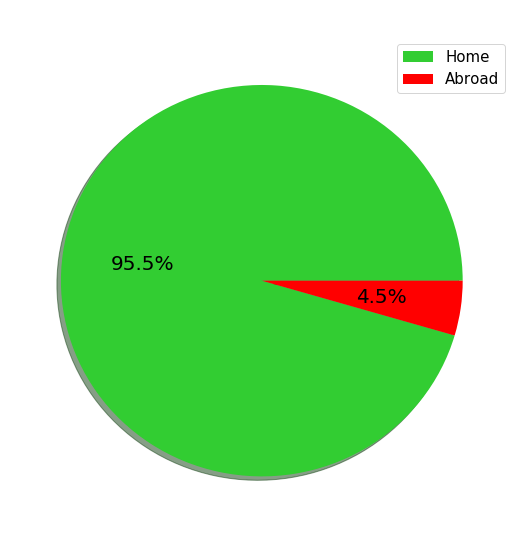

In [10]:
AbroadLen = len(RQ2.loc[RQ2.Abroad==True])
HomeLen = len(RQ2.loc[RQ2.Abroad==False])

AH = pd.DataFrame(columns = ["Home", "Abroad"])
AH.set_value(0,'Abroad',AbroadLen)
AH.set_value(0,'Home',HomeLen)
AH = AH.transpose()

mpl.rcParams['font.size'] = 20
AH.plot(figsize=(9,9),kind='pie',labels=['',''],y=0,colors=['limegreen','r'],autopct='%.1f%%',shadow=True)
plt.legend(prop={'size':15},labels=AH.index)
plt.title('Home vs Abroad',color='white',fontsize=30)
plt.ylabel('')

AH

### Average Age Home/Abroad
* Finding the average age of Home and Abroad players and displaying them in a dataframe.

#### Findings
* Abroad players are younger than Home players but there is **very little difference**.

,Home,Abroad
0,26.5011,25.9103


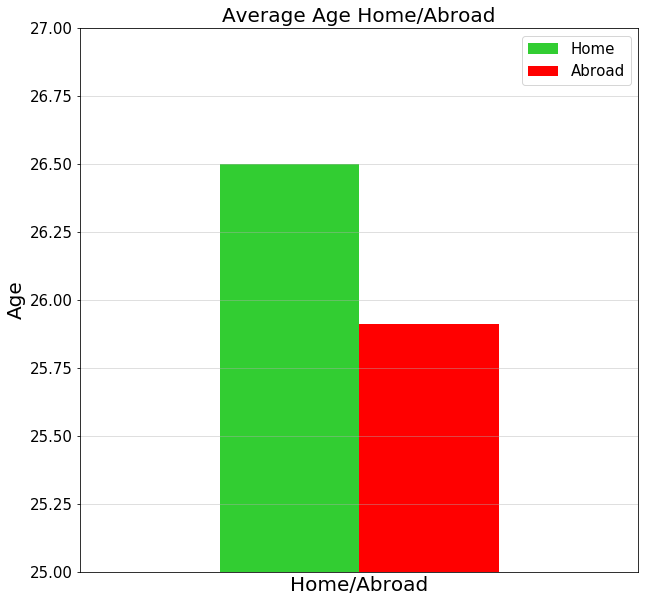

In [18]:
AbroadAge = Abroad.age.mean()
HomeAge = Home.age.mean()

AHAge = pd.DataFrame(columns = ["Home", "Abroad"])
AHAge.set_value(0,'Home',HomeAge)
AHAge.set_value(0,'Abroad',AbroadAge)

mpl.rcParams['font.size'] = 15
axis_size=20
color = ['limegreen','r']
fig = plt.figure(figsize=(10,10))
ax0 = plt.subplot()
ax0.set_ylim([25,27])
ax0.set_ylabel('Age',size=axis_size)
ax0.set_xlabel('Home/Abroad',size=axis_size)
ax0.set_title('Average Age Home/Abroad',size=20)
AHAge.plot(ax=ax0,kind='bar',color=color,grid=True)
ax0.grid(alpha=0.5)
plt.xticks([])

AHAge

### Average Form Home/Abroad
* Finding the average form of Home and Abroad players and displaying them in a dataframe.

#### Findings
* Abroad players on average perform **.5** better than Home players.

,Home,Abroad
0,2.0473,2.60212


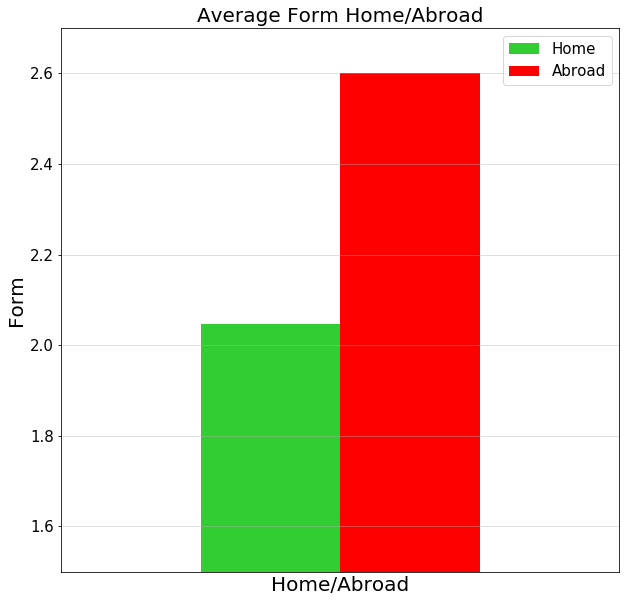

In [19]:
AbroadForm = Abroad['Average Form'].mean()
HomeForm = Home['Average Form'].mean()

AHForm = pd.DataFrame(columns = ["Home", "Abroad"])
AHForm.set_value(0,'Home',HomeForm)
AHForm.set_value(0,'Abroad',AbroadForm)

mpl.rcParams['font.size'] = 15
axis_size=20
color = ['limegreen','r']
fig = plt.figure(figsize=(10,10))
ax0 = plt.subplot()
ax0.set_ylim([1.5,2.7])
ax0.set_ylabel('Form',size=axis_size)
ax0.set_xlabel('Home/Abroad',size=axis_size)
ax0.set_title('Average Form Home/Abroad',size=20)
AHForm.plot(ax=ax0,kind='bar',color=color,grid=True)
ax0.grid(alpha=0.5)
plt.xticks([])

AHForm

### Average Overall Home/Abroad
* Finding the overall form of Home and Abroad players and displaying them in a dataframe.

#### Findings
* Abroad players on average are a **5 full ratings higher** than Home players which is a huge difference in a game like FIFA.

,Home,Abroad
0,72.605,78.4744


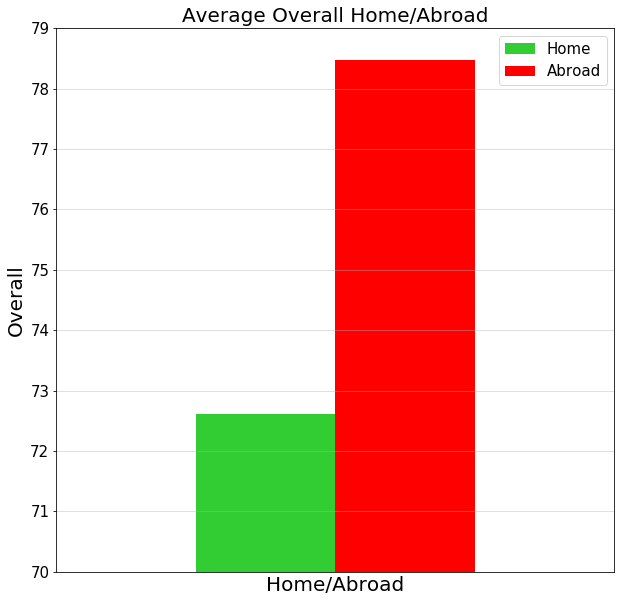

In [20]:
AbroadOverall = Abroad['overall'].mean()
HomeOverall = Home['overall'].mean()

AHOverall = pd.DataFrame(columns = ["Home", "Abroad"])
AHOverall.set_value(0,'Home',HomeOverall)
AHOverall.set_value(0,'Abroad',AbroadOverall)

mpl.rcParams['font.size'] = 15
axis_size=20
color = ['limegreen','r']
fig = plt.figure(figsize=(10,10))
ax0 = plt.subplot()
ax0.set_ylim([70,79])
ax0.set_ylabel('Overall',size=axis_size)
ax0.set_xlabel('Home/Abroad',size=axis_size)
ax0.set_title('Average Overall Home/Abroad',size=20)
AHOverall.plot(ax=ax0,kind='bar',color=color,grid=True)
ax0.grid(alpha=0.5)
plt.xticks([])

AHOverall